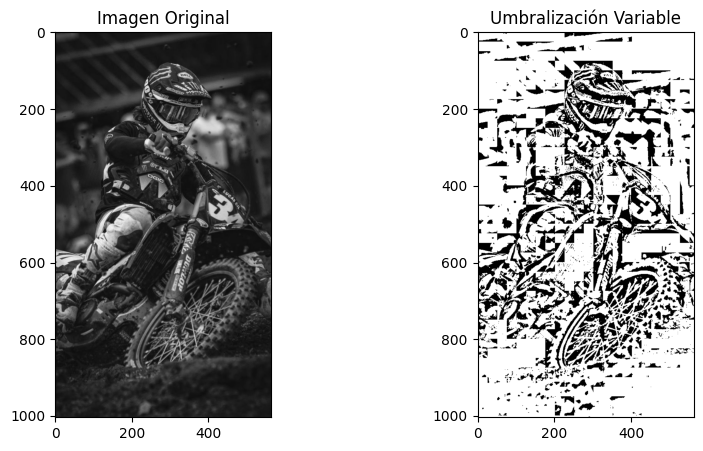

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Lectura de la imagen
image = cv2.imread('Motorica.jpg', cv2.IMREAD_GRAYSCALE)

# Verificar si la lectura de la imagen fue exitosa
if image is None:
    print("Error al leer la imagen.")
else:
    # Función para calcular el umbral variable utilizando la técnica de partición
    def variable_threshold(image, block_size, c):
        threshold_image = np.zeros_like(image)
        for y in range(0, image.shape[0], block_size):
            for x in range(0, image.shape[1], block_size):
                block = image[y:y+block_size, x:x+block_size]
                block_mean = np.mean(block)
                threshold = block_mean - c
                threshold_image[y:y+block_size, x:x+block_size] = (block > threshold) * 255
        return threshold_image

    # Definir tamaño de bloque y parámetro de compensación
    block_size = 25
    c = 10

    # Aplicar umbralización variable
    threshold_image = variable_threshold(image, block_size, c)

    # Mostrar la imagen original y la imagen umbralizada
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Imagen Original')
    
    plt.subplot(1, 2, 2)
    plt.imshow(threshold_image, cmap='gray')
    plt.title('Umbralización Variable')
    
    plt.show()


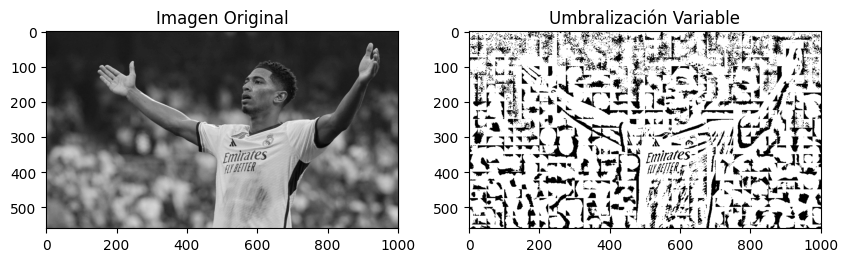

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#variables locales

image = cv2.imread('Bellingol.jpg', 0) 
# Función para calcular el umbral variable utilizando la técnica de variables locales
def local_threshold(image, block_size, threshold_offset):
    threshold_image = np.zeros_like(image)
    for y in range(0, image.shape[0], block_size):
        for x in range(0, image.shape[1], block_size):
            block = image[y:y+block_size, x:x+block_size]
            block_mean = np.mean(block)
            block_std = np.std(block)
            threshold = block_mean - (threshold_offset * block_std)
            threshold_image[y:y+block_size, x:x+block_size] = (block > threshold) * 255
    return threshold_image
# Definir tamaño de bloque y offset de umbral
block_size = 25
threshold_offset = 0.8
# Aplicar umbralización variable
threshold_image = local_threshold(image, block_size, threshold_offset)
# Mostrar la imagen original y la imagen umbralizada
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')
plt.subplot(1, 2, 2)
plt.imshow(threshold_image, cmap='gray')
plt.title('Umbralización Variable')
plt.show()

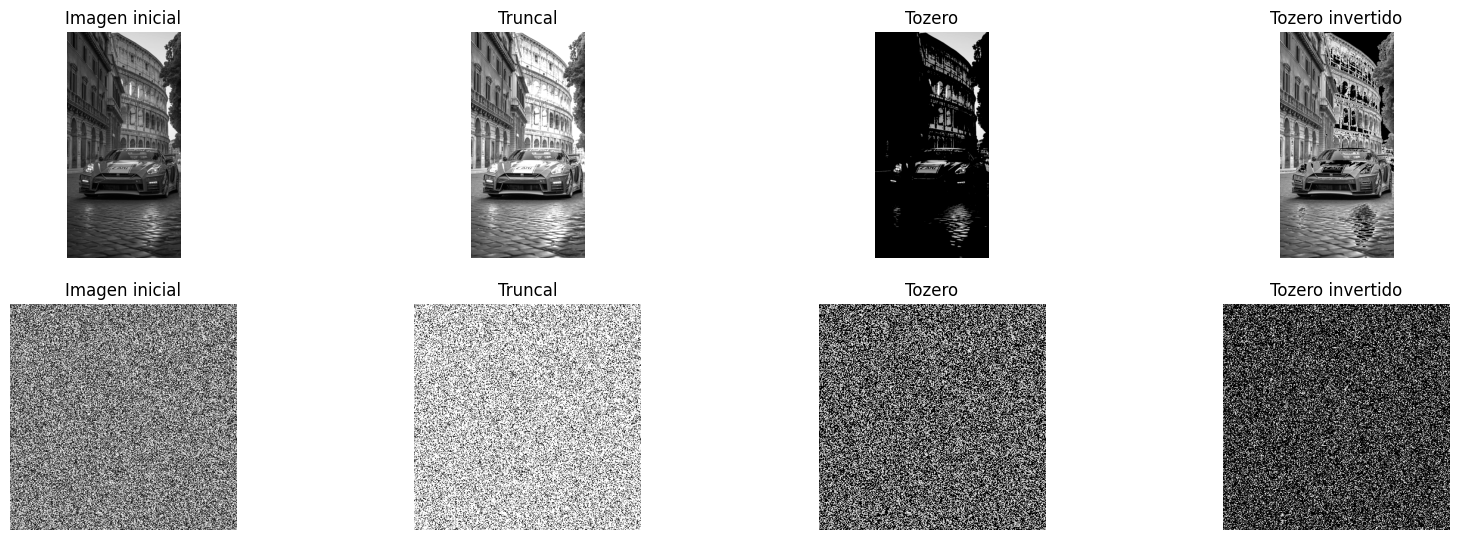

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('Ricoauto.jpg', 0)
img2 = np.random.randint(0,256,(300,300), dtype=np.uint8) #np va  a generar datos random - va a generar valores entre esos valores - 8 bits (imagen pequeña con poca resolucion)

_,umb_trunc = cv2.threshold(img, 127, 200, cv2.THRESH_TRUNC)
_,umb_tozero = cv2.threshold(img, 127, 200, cv2.THRESH_TOZERO)
_,umb_tozero_inv = cv2.threshold(img, 127, 200, cv2.THRESH_TOZERO_INV)

_,umb_trunc2 = cv2.threshold(img2, 127, 200, cv2.THRESH_TRUNC)
_,umb_tozero2 = cv2.threshold(img2, 127, 200, cv2.THRESH_TOZERO)
_,umb_tozero_inv2 = cv2.threshold(img2, 127, 200, cv2.THRESH_TOZERO_INV)

plt.figure(figsize=(20, 10))

plt.subplot(341)
plt.title('Imagen inicial')
plt.imshow(img, cmap = "gray")
plt.axis('off')

plt.subplot(342)
plt.title('Truncal')
plt.imshow(umb_trunc, cmap='gray')
plt.axis('off')

plt.subplot(343)
plt.title('Tozero')
plt.imshow(umb_tozero, cmap='gray')
plt.axis('off')

plt.subplot(344)
plt.title('Tozero invertido')
plt.imshow(umb_tozero_inv, cmap='gray')
plt.axis('off')

#////////////////////////

plt.subplot(345)
plt.title('Imagen inicial')
plt.imshow(img2, cmap='gray')
plt.axis('off')

plt.subplot(346)
plt.title('Truncal')
plt.imshow(umb_trunc2, cmap='gray')
plt.axis('off')

plt.subplot(347)
plt.title('Tozero')
plt.imshow(umb_tozero2, cmap='gray')
plt.axis('off')

plt.subplot(348)
plt.title('Tozero invertido')
plt.imshow(umb_tozero_inv2, cmap='gray')
plt.axis('off')

plt.show()






C:\Users\estudiante\AppData\Local\Temp\ipykernel_16872\966873809.py:8: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 256 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  image[:, i] = i
C:\Users\estudiante\AppData\Local\Temp\ipykernel_16872\966873809.py:8: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 257 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  image[:, i] = i
C:\Users\estudiante\AppData\Local\Temp\ipykernel_16872\966873809.py:8: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 258 to uint8 will fail in the future.
For the old behavior, usual

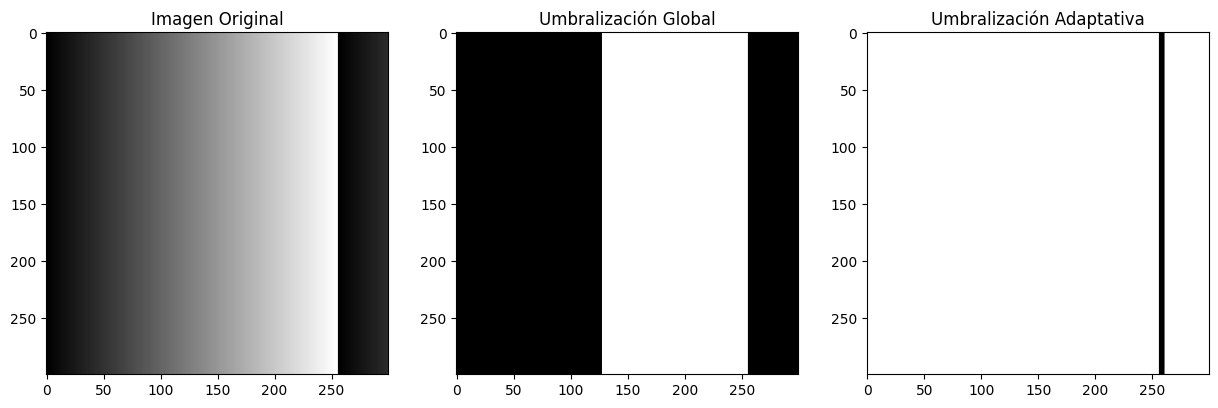

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def generar_imagen_gradiente():
    image = np.zeros((300, 300), dtype=np.uint8)
    for i in range(300):
        image[:, i] = i
    return image

def umbralizacion_global(image):
    _, thresh_global = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    return thresh_global

def umbralizacion_adaptativa(image):
    thresh_adapt = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
    return thresh_adapt

def mostrar_imagenes(original, umbral_global, umbral_adapt):
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Imagen Original')

    plt.subplot(1, 3, 2)
    plt.imshow(umbral_global, cmap='gray')
    plt.title('Umbralización Global')

    plt.subplot(1, 3, 3)
    plt.imshow(umbral_adapt, cmap='gray')
    plt.title('Umbralización Adaptativa')

    plt.show()

# Generar una imagen en escala de grises con un gradiente lineal
imagen_gradiente = generar_imagen_gradiente()

# Aplicar umbralización global
umbral_global = umbralizacion_global(imagen_gradiente)

# Aplicar umbralización adaptativa
umbral_adapt = umbralizacion_adaptativa(imagen_gradiente)

# Mostrar las imágenes
mostrar_imagenes(imagen_gradiente, umbral_global, umbral_adapt)


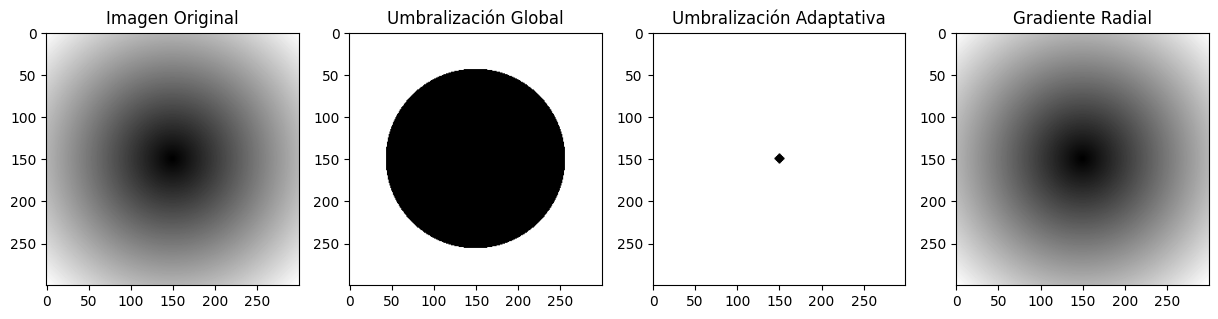

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def generar_imagen_gradiente_radial():
    # Crear una cuadrícula de coordenadas
    x, y = np.meshgrid(np.linspace(-1, 1, 300), np.linspace(-1, 1, 300))
    # Calcular la distancia desde el centro
    distancia = np.sqrt(x**2 + y**2)
    # Normalizar la distancia para obtener un gradiente radial
    distancia = (distancia - distancia.min()) / (distancia.max() - distancia.min())
    # Escalar a valores de 0 a 255
    imagen_radial = (distancia * 255).astype(np.uint8)
    return imagen_radial

def umbralizacion_global(image):
    _, thresh_global = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    return thresh_global

def umbralizacion_adaptativa(image):
    thresh_adapt = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
    return thresh_adapt

def mostrar_imagenes(original, umbral_global, umbral_adapt):
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 4, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Imagen Original')

    plt.subplot(1, 4, 2)
    plt.imshow(umbral_global, cmap='gray')
    plt.title('Umbralización Global')

    plt.subplot(1, 4, 3)
    plt.imshow(umbral_adapt, cmap='gray')
    plt.title('Umbralización Adaptativa')

    plt.subplot(1, 4, 4)
    plt.imshow(original, cmap='gray')
    plt.title('Gradiente Radial')

    plt.show()

# Generar una imagen en escala de grises con un gradiente radial
imagen_radial = generar_imagen_gradiente_radial()

# Aplicar umbralización global
umbral_global = umbralizacion_global(imagen_radial)

# Aplicar umbralización adaptativa
umbral_adapt = umbralizacion_adaptativa(imagen_radial)

# Mostrar las imágenes
mostrar_imagenes(imagen_radial, umbral_global, umbral_adapt)


C:\Users\estudiante\AppData\Local\Temp\ipykernel_16872\259131873.py:8: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 256 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  image[:, i] = i
C:\Users\estudiante\AppData\Local\Temp\ipykernel_16872\259131873.py:8: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 257 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  image[:, i] = i
C:\Users\estudiante\AppData\Local\Temp\ipykernel_16872\259131873.py:8: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 258 to uint8 will fail in the future.
For the old behavior, usual

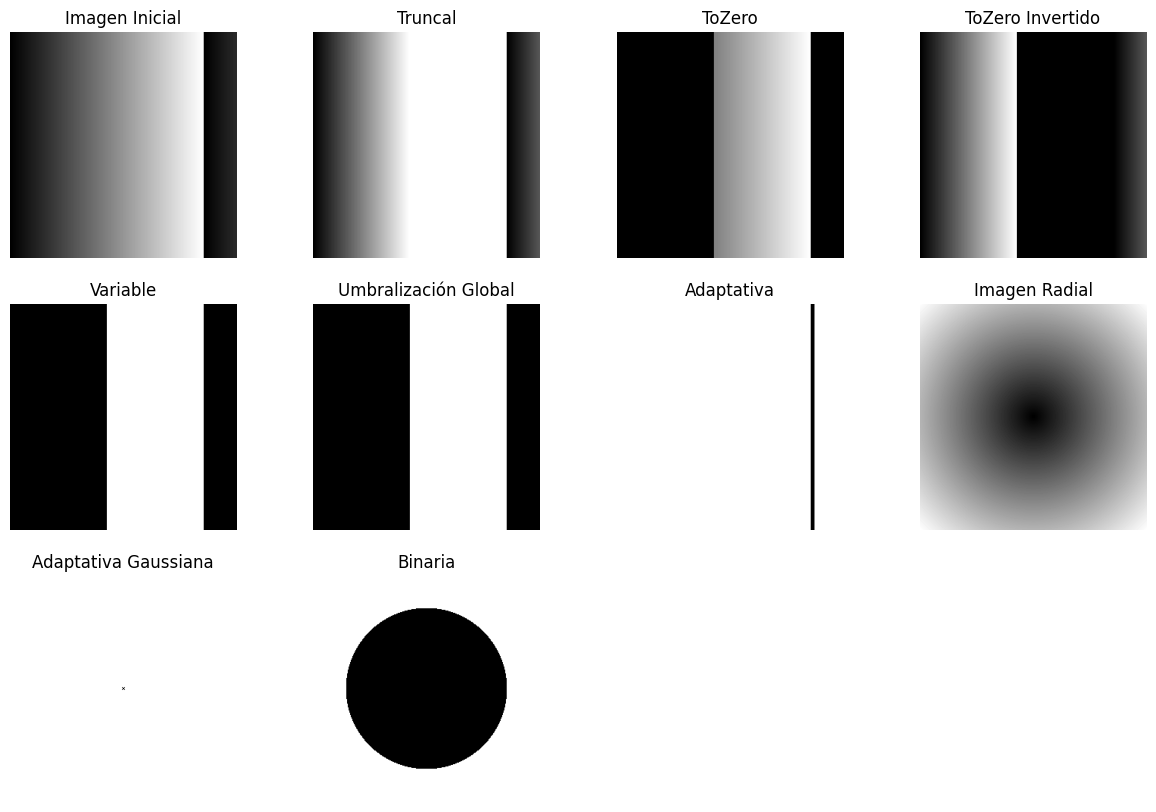

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def generar_imagen_gradiente():
    image = np.zeros((300, 300), dtype=np.uint8)
    for i in range(300):
        image[:, i] = i
    return image

def umbralizacion_trunc(image):
    _, thresh_trunc = cv2.threshold(image, 127, 200, cv2.THRESH_TRUNC)
    return thresh_trunc

def umbralizacion_tozero(image):
    _, thresh_tozero = cv2.threshold(image, 127, 260, cv2.THRESH_TOZERO)
    return thresh_tozero

def umbralizacion_tozero_inv(image):
    _, thresh_tozero_inv = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)
    return thresh_tozero_inv

def umbralizacion_variable(image):
    _, thresh_variable = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    return thresh_variable

def umbralizacion_global(image):
    _, thresh_global = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    return thresh_global

def umbralizacion_adaptativa(image):
    thresh_adapt = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
    return thresh_adapt

def generar_imagen_gradiente_radial():
    # Crear una cuadrícula de coordenadas
    x, y = np.meshgrid(np.linspace(-1, 1, 300), np.linspace(-1, 1, 300))
    # Calcular la distancia desde el centro
    distancia = np.sqrt(x**2 + y**2)
    # Normalizar la distancia para obtener un gradiente radial
    distancia = (distancia - distancia.min()) / (distancia.max() - distancia.min())
    # Escalar a valores de 0 a 255
    imagen_radial = (distancia * 255).astype(np.uint8)
    return imagen_radial

def umbralizacion_adaptativa_gaussiana(image):
    thresh_adapt_gauss = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    return thresh_adapt_gauss

def umbralizacion_binaria(image):
    _, thresh_binaria = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    return thresh_binaria

def mostrar_imagenes(images, titles):
    num_images = len(images)
    plt.figure(figsize=(15, 10))
    for i in range(num_images):
        plt.subplot(3, 4, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Generar las imágenes
imagen_inicial = generar_imagen_gradiente()
truncal = umbralizacion_trunc(imagen_inicial)
tozero = umbralizacion_tozero(imagen_inicial)
tozero_inv = umbralizacion_tozero_inv(imagen_inicial)
variable = umbralizacion_variable(imagen_inicial)
global_umbral = umbralizacion_global(imagen_inicial)
adaptativa = umbralizacion_adaptativa(imagen_inicial)

imagen_radial = generar_imagen_gradiente_radial()
adaptativa_gauss = umbralizacion_adaptativa_gaussiana(imagen_radial)
binaria = umbralizacion_binaria(imagen_radial)

# Definir títulos para cada imagen
titles = ['Imagen Inicial', 'Truncal', 'ToZero', 'ToZero Invertido', 'Variable', 'Umbralización Global', 'Adaptativa',
          'Imagen Radial', 'Adaptativa Gaussiana', 'Binaria']

# Mostrar las imágenes
mostrar_imagenes([imagen_inicial, truncal, tozero, tozero_inv, variable, global_umbral, adaptativa, imagen_radial, adaptativa_gauss, binaria], titles)



In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def generar_imagen_gradiente():
    image = np.zeros((300, 300), dtype=np.uint8)
    for i in range(300):
        image[:, i] = i
    return image

def umbralizacion_trunc(image):
    _, thresh_trunc = cv2.threshold(image, 127, 200, cv2.THRESH_TRUNC)
    return thresh_trunc

def umbralizacion_tozero(image):
    _, thresh_tozero = cv2.threshold(image, 127, 260, cv2.THRESH_TOZERO)
    return thresh_tozero

def umbralizacion_tozero_inv(image):
    _, thresh_tozero_inv = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)
    return thresh_tozero_inv

def umbralizacion_variable(image):
    _, thresh_variable = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    return thresh_variable

def umbralizacion_global(image):
    _, thresh_global = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    return thresh_global

def umbralizacion_adaptativa(image):
    thresh_adapt = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
    return thresh_adapt

def generar_imagen_gradiente_radial():
    # Crear una cuadrícula de coordenadas
    x, y = np.meshgrid(np.linspace(-1, 1, 300), np.linspace(-1, 1, 300))
    # Calcular la distancia desde el centro
    distancia = np.sqrt(x**2 + y**2)
    # Normalizar la distancia para obtener un gradiente radial
    distancia = (distancia - distancia.min()) / (distancia.max() - distancia.min())
    # Escalar a valores de 0 a 255
    imagen_radial = (distancia * 255).astype(np.uint8)
    return imagen_radial

def umbralizacion_adaptativa_gaussiana(image):
    thresh_adapt_gauss = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    return thresh_adapt_gauss

def umbralizacion_binaria(image):
    _, thresh_binaria = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    return thresh_binaria

def umbralizacion_isodata(image):
    _, thresh_isodata = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return thresh_isodata

def umbralizacion_otsu(image):
    _, thresh_otsu = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return thresh_otsu

def umbralizacion_picos(image):
    hist, _ = np.histogram(image.ravel(), bins=256, range=[0,256])
    picos = cv2.calcHist([image], [0], None, [256], [0,256])
    _, thresh_picos = cv2.threshold(image, np.argmax(picos), 255, cv2.THRESH_BINARY)
    return thresh_picos

def mostrar_imagenes(images, titles):
    num_images = len(images)
    plt.figure(figsize=(15, 10))
    for i in range(num_images):
        plt.subplot(3, 4, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Generar las imágenes
imagen_inicial = generar_imagen_gradiente()
truncal = umbralizacion_trunc(imagen_inicial)
tozero = umbralizacion_tozero(imagen_inicial)
tozero_inv = umbralizacion_tozero_inv(imagen_inicial)
variable = umbralizacion_variable(imagen_inicial)
global_umbral = umbralizacion_global(imagen_inicial)
adaptativa = umbralizacion_adaptativa(imagen_inicial)
isodata = umbralizacion_isodata(imagen_inicial)
otsu = umbralizacion_otsu(imagen_inicial)
picos = umbralizacion_picos(imagen_inicial)

imagen_radial = generar_imagen_gradiente_radial()
adaptativa_gauss = umbralizacion_adaptativa_gaussiana(imagen_radial)
binaria = umbralizacion_binaria(imagen_radial)
adaptativa_gauss = umbralizacion_adaptativa_gaussiana(imagen_radial)
picos_radial = umbralizacion_picos(imagen_radial)

# Definir títulos para cada imagen
titles = ['Imagen Inicial', 'Truncal', 'ToZero', 'ToZero Invertido', 'Variable', 'Umbralización Global', 'Adaptativa',
          'Isodata', 'Otsu', 'Picos', 'Imagen Radial', 'Adaptativa Gaussiana', 'Binaria


SyntaxError: unterminated string literal (detected at line 98) (1389125734.py, line 98)